<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/Models_multiinput/revision_telescopios_de_2_a_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import os
import pandas as pd
import glob 
import re
import gzip

In [ ]:
ground_dir="/content/drive/MyDrive/TFG arturo"
datos_dir="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11"

os.chdir(datos_dir)

files_names=glob.glob("*.dt.gz")
new_files_names=[h.replace(".dt.gz",".dt") for h in files_names]
for j in range(len(files_names)):
  with gzip.open(os.path.join(datos_dir,files_names[j]),"rb") as f:
    fp=open(new_files_names[j],"wb")
    aux=f.read()
    fp.write(aux)
    fp.close()

In [ ]:
#ahora vamos a cargar los datos dt segun telescopio, luego las evaluaremos tanto por RUN como juntas
ground_dir="/content/drive/MyDrive/TFG arturo"
datos_dir="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11"
datos_dir_npy="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11/npy_files"
os.chdir(datos_dir)
#vamos a hacer un bucle for para ir por los telescopios
for i in range(2,12):
  names_aux=glob.glob("gamma_tel_"+str(i)+"_*.dt")
  for j in range(len(names_aux)):
    print(names_aux[j],end="\n")
    datos_aux=[]
    aux_df=pd.read_csv(os.path.join(datos_dir,names_aux[j]),sep='  ',names=["1","2","3","4","5","6"],engine="python")
    #ahora la procesamos y la guardamos en un npy
    value_auf=aux_df[['1','3','4','5']].copy()
    del aux_df
    #tenemos que agupar los valores y normalizarlos 
    value_auf.loc[value_auf["5"]<0]=0
    max_aux=np.amax(value_auf["5"])
    value_auf["5"]=value_auf["5"]/max_aux
    x_minimo=min(value_auf['3'])
    y_minimo=min(value_auf['4'])
    value_auf['3']=value_auf['3'].apply(lambda x: round((x-x_minimo)/333))
    value_auf['4']=value_auf['4'].apply(lambda x: round((x-y_minimo)/192))
    event_aux=value_auf["1"].unique()
    for k in event_aux:
      #cada evento tiene que ponerse en una imagen con sus valores
      array_aux=value_auf.loc[value_auf["1"]==k][["3","4","5"]]
      #lo que vamos a hacer es qponer los valores en una matriz creada de antemano y guardar esa matrix
      matrix_aux=np.zeros((60-5,131-38))
      matrix_aux[array_aux["3"].to_numpy()-5,array_aux["4"].to_numpy()-39]=array_aux["5"].to_numpy()
      datos_aux.append(matrix_aux)
    name_npy=os.path.join(datos_dir_npy,"telesc_"+str(i)+"_RUN_"+str(j+1)+".npy")
    np.save(name_npy,np.array(datos_aux))


gamma_tel_2_run_02.dt
gamma_tel_2_run_01.dt
gamma_tel_2_run_04.dt
gamma_tel_2_run_03.dt
gamma_tel_2_run_06.dt
gamma_tel_2_run_05.dt
gamma_tel_2_run_08.dt
gamma_tel_2_run_07.dt
gamma_tel_2_run_39.dt
gamma_tel_2_run_38.dt
gamma_tel_2_run_40.dt
gamma_tel_2_run_41.dt
gamma_tel_3_run_06.dt
gamma_tel_3_run_02.dt
gamma_tel_3_run_01.dt
gamma_tel_3_run_05.dt
gamma_tel_3_run_07.dt
gamma_tel_3_run_24.dt
gamma_tel_3_run_25.dt
gamma_tel_3_run_26.dt
gamma_tel_3_run_09.dt
gamma_tel_3_run_08.dt
gamma_tel_3_run_39.dt
gamma_tel_3_run_40.dt
gamma_tel_3_run_41.dt
gamma_tel_4_run_02.dt
gamma_tel_4_run_03.dt
gamma_tel_4_run_10.dt
gamma_tel_4_run_01.dt
gamma_tel_4_run_11.dt
gamma_tel_4_run_12.dt
gamma_tel_4_run_21.dt
gamma_tel_4_run_22.dt
gamma_tel_4_run_30.dt
gamma_tel_4_run_31.dt
gamma_tel_4_run_20.dt
gamma_tel_4_run_13.dt
gamma_tel_5_run_01.dt
gamma_tel_5_run_02.dt
gamma_tel_5_run_11.dt
gamma_tel_5_run_12.dt
gamma_tel_5_run_13.dt
gamma_tel_5_run_10.dt
gamma_tel_5_run_03.dt
gamma_tel_5_run_20.dt
gamma_tel_

In [ ]:
#ahora queremos ver los resultados
datos_dir_graphs="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11/graphs"
datos_dir_npy="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11/npy_files"

archivos=os.listdir(datos_dir_npy)
for i in range(len(archivos)):
  datos=np.load(os.path.join(datos_dir_npy,archivos[i]))
  nombre_aux=archivos[i].replace(".npy","")
  nombre_aux_suma_img="suma_total_"+nombre_aux
  matrix_aux=sum(datos)
  #np.save(os.path.join(stats_dir,nombre_aux_suma_np),matrix_aux)
  plt.figure(figsize=(16,16))
  plt.subplot(3,3,2)
  plt.imshow(matrix_aux,aspect="auto")
  plt.title(nombre_aux_suma_img,fontsize=14)
  #lo hacemos tambien para las indicendias totales, aquellas que superan un humbral

  #ahora calculamos los percentiles
  perc=["perc75","perc85","perc99.9"]
  vals_perc=[np.percentile(datos,75),np.percentile(datos,85),np.percentile(datos,99.9)]
  for j in range(len(perc)):
    datos_aux=datos.copy()
    nombre_aux_perc_img="suma_"+perc[j]+"_"+nombre_aux
    datos_aux[datos<vals_perc[j]]=0
    matrix_aux=sum(datos_aux)
    plt.subplot(3,3,4+j)
    plt.imshow(matrix_aux,aspect="auto")
    plt.title(nombre_aux_perc_img,fontsize=14)
    #lo hacemos tambien para las indicendias totales, aquellas que superan el percentil, las ponemos 
    #a valor 1 independientemente, y luego sumamos
    datos_aux=datos.copy()
    datos_aux[datos>=vals_perc[j]]=1.0
    datos_aux[datos<vals_perc[j]]=0
    matrix_aux=sum(datos_aux)
    nombre_aux_perc_img="incidencia_"+perc[j]+"_"+nombre_aux
    plt.subplot(3,3,7+j)
    plt.imshow(matrix_aux,aspect="auto")
    plt.title(nombre_aux_perc_img,fontsize=14)
  plt.tight_layout()
  plt.savefig(os.path.join(datos_dir_graphs,nombre_aux)+".png")
  plt.close()

KeyboardInterrupt: ignored

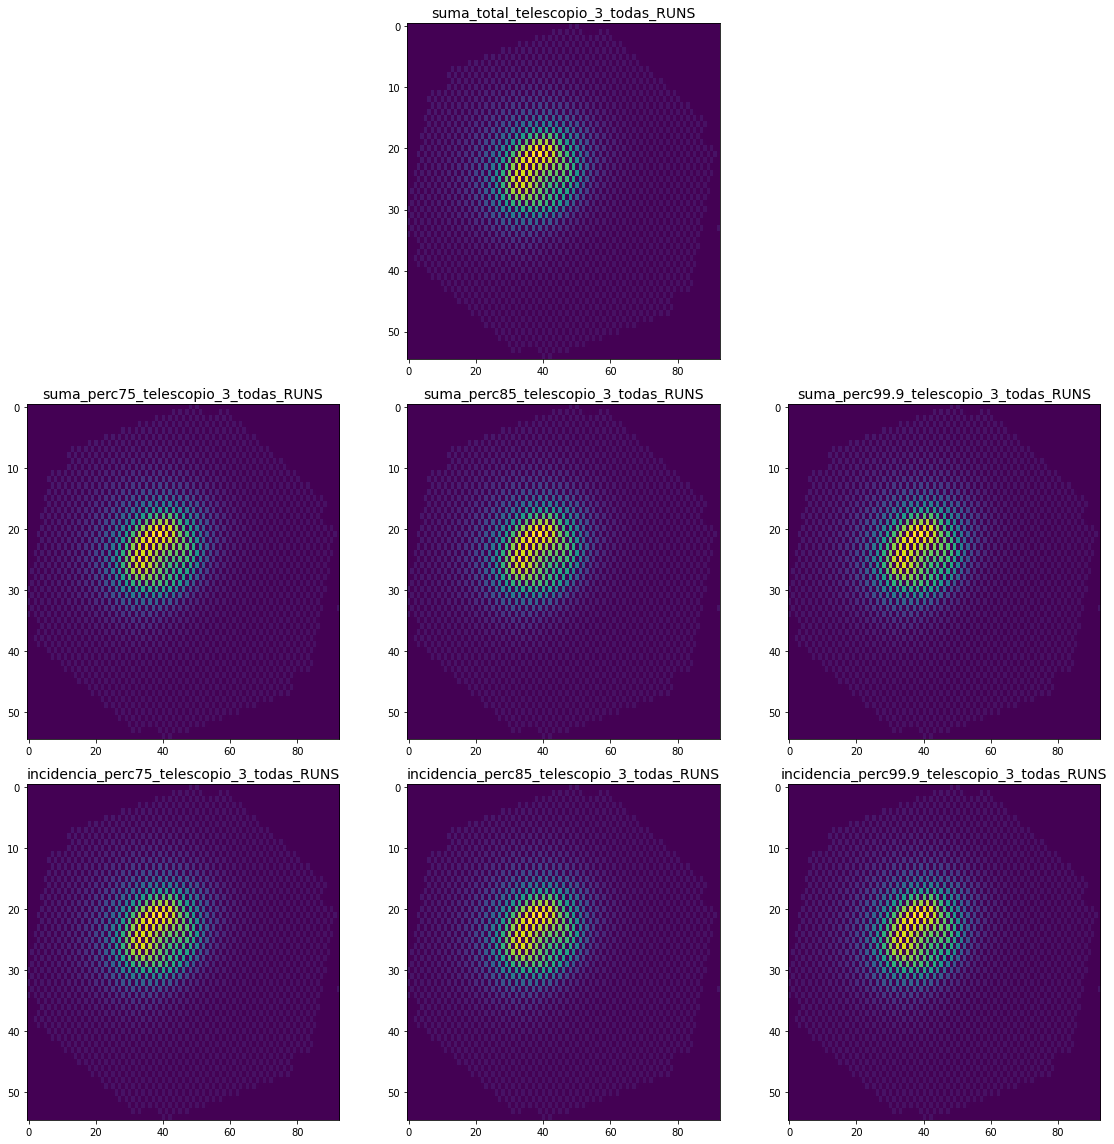

In [ ]:
#para todos
datos_dir_graphs="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11/graphs"
datos_dir_npy="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11/npy_files"
datos_total=[]
for i in range(2,12):
  os.chdir(datos_dir_npy)
  archivos=glob.glob("telesc_"+str(i)+"_*.npy")
  matriz_total=np.zeros((60-5,131-38))
  datos_total=[]
  for k in archivos:
    datos=np.load(os.path.join(datos_dir_npy,k))
    datos_total.append(datos)
    matriz_total+=sum(datos)
  nombre_aux="telescopio_"+str(i)+"_todas_RUNS"
  nombre_aux_suma_img="suma_total_"+nombre_aux
  
  #np.save(os.path.join(stats_dir,nombre_aux_suma_np),matrix_aux)
  plt.figure(figsize=(16,16))
  plt.subplot(3,3,2)
  plt.imshow(matriz_total,aspect="auto")
  plt.title(nombre_aux_suma_img,fontsize=14)
  #lo hacemos tambien para las indicendias totales, aquellas que superan un humbral

  #ahora calculamos los percentiles
  perc=["perc75","perc85","perc99.9"]
  vals_perc=[np.percentile(datos_total,75),np.percentile(datos_total,85),np.percentile(datos_total,99.9)]
  del matriz_total
  for j in range(len(perc)):
    nombre_aux_perc_img="suma_"+perc[j]+"_"+nombre_aux
    datos_total=matriz_total.copy()
    datos_aux[matriz_total<vals_perc[j]]=0
    plt.subplot(3,3,4+j)
    plt.imshow(matriz_total,aspect="auto")
    plt.title(nombre_aux_perc_img,fontsize=14)
    #lo hacemos tambien para las indicendias totales, aquellas que superan el percentil, las ponemos 
    #a valor 1 independientemente, y luego sumamos
    datos_aux=matriz_total.copy()
    datos_aux[matriz_total>=vals_perc[j]]=1.0
    datos_aux[matriz_total<vals_perc[j]]=0
    nombre_aux_perc_img="incidencia_"+perc[j]+"_"+nombre_aux
    plt.subplot(3,3,7+j)
    plt.imshow(matriz_total,aspect="auto")
    plt.title(nombre_aux_perc_img,fontsize=14)
  plt.tight_layout()
  plt.savefig(os.path.join(datos_dir_graphs,nombre_aux)+".png")
  plt.close()

In [ ]:
for i in range(2,3):
  os.chdir(datos_dir_npy)
  archivos=glob.glob("gamma_tel_"+str(i)+"_*.npy")
  matriz_total=np.zeros((60-5,131-38))
  for k in archivos:
    datos=np.load(os.path.join(datos_dir_npy,k))
    matriz_total+=sum(datos)

In [ ]:
#para todos
datos_dir_graphs="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11/graphs"
datos_dir_npy="/content/drive/MyDrive/TFG arturo/gamma_variadito_telescopios_2_al_11/npy_files"
datos_total=[]
for i in range(2,12):
  os.chdir(datos_dir_npy)
  archivos=glob.glob("telesc_"+str(i)+"_*.npy")
  matriz_total=np.zeros((60-5,131-38))
  datos_total=[]
  for k in archivos:
    datos=np.load(os.path.join(datos_dir_npy,k))
    datos_total.append(datos)
    matriz_total+=sum(datos)
  nombre_aux="telescopio_"+str(i)+"_todas_RUNS"
  nombre_aux_suma_img="suma_total_"+nombre_aux
  
  #np.save(os.path.join(stats_dir,nombre_aux_suma_np),matrix_aux)
  plt.figure(figsize=(16,16))
  plt.imshow(matriz_total,aspect="auto")
  plt.colorbar()
  plt.title(nombre_aux_suma_img,fontsize=14)
  
  plt.tight_layout()
  plt.savefig(os.path.join(datos_dir_graphs,nombre_aux)+".png")
  plt.close()